# K Nearest Neighbor (KNN)

- Nguyễn Hữu Vũ  
- Nhóm nghiên cứu về AI đại học Bách Khoa Tp. Hồ Chí Minh

In [1]:
import numpy as np
import pandas as pd

In [2]:
# Load dữ liệu
# https://www.kaggle.com/uciml/iris
dataset = pd.read_csv('Iris.csv')

## 1) Khám phá dữ liệu

In [3]:
# get how many instances (rows) and how many attributes (columns)
dataset.shape

(150, 6)

In [4]:
#show thông tin thống kê cơ bản: max, min, mean của các columns trong dataset
dataset.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [5]:
#để hiện thông tin thống kê tất cả column (gồm categorical columns)
dataset.describe(include = 'all')

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
count,150.000000,150.000000,150.000000,150.000000,150.000000,150
unique,NaN,NaN,NaN,NaN,NaN,3
top,NaN,NaN,NaN,NaN,NaN,Iris-versicolor
freq,NaN,NaN,NaN,NaN,NaN,50
mean,75.500000,5.843333,3.054000,3.758667,1.198667,NaN
std,43.445368,0.828066,0.433594,1.764420,0.763161,NaN
min,1.000000,4.300000,2.000000,1.000000,0.100000,NaN
25%,38.250000,5.100000,2.800000,1.600000,0.300000,NaN
50%,75.500000,5.800000,3.000000,4.350000,1.300000,NaN
75%,112.750000,6.400000,3.300000,5.100000,1.800000,NaN


In [6]:
#Show vài dòng đầu tiên của dữ liệu
dataset.head(5)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [7]:
#Show vài dòng cuối của dữ liệu
dataset.tail(3)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica
149,150,5.9,3.0,5.1,1.8,Iris-virginica


In [8]:
# T number of instances (rows) that belong to each class. 
dataset.groupby('Species').size()

Species
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
dtype: int64

###  Visualization

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

#### Pairplot

C:\Users\Huu Vu\Downloads\Programs\WPy-3662\python-3.6.6.amd64\lib\site-packages\seaborn\axisgrid.py:2065: UserWarning: The `size` parameter has been renamed to `height`; pleaes update your code.
  warnings.warn(msg, UserWarning)


<Figure size 432x288 with 0 Axes>

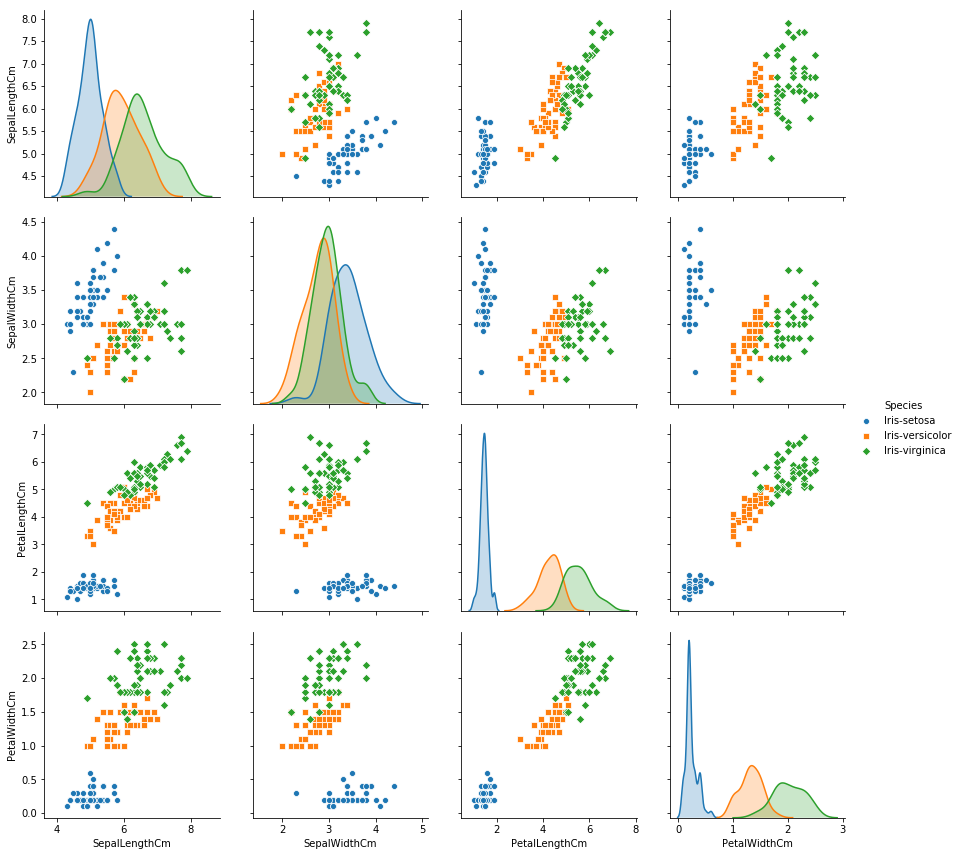

In [10]:
plt.figure()
sns.pairplot(dataset.drop("Id", axis=1), hue = "Species", size=3, markers=["o", "s", "D"])
plt.show()

####  Boxplots

<Figure size 432x288 with 0 Axes>

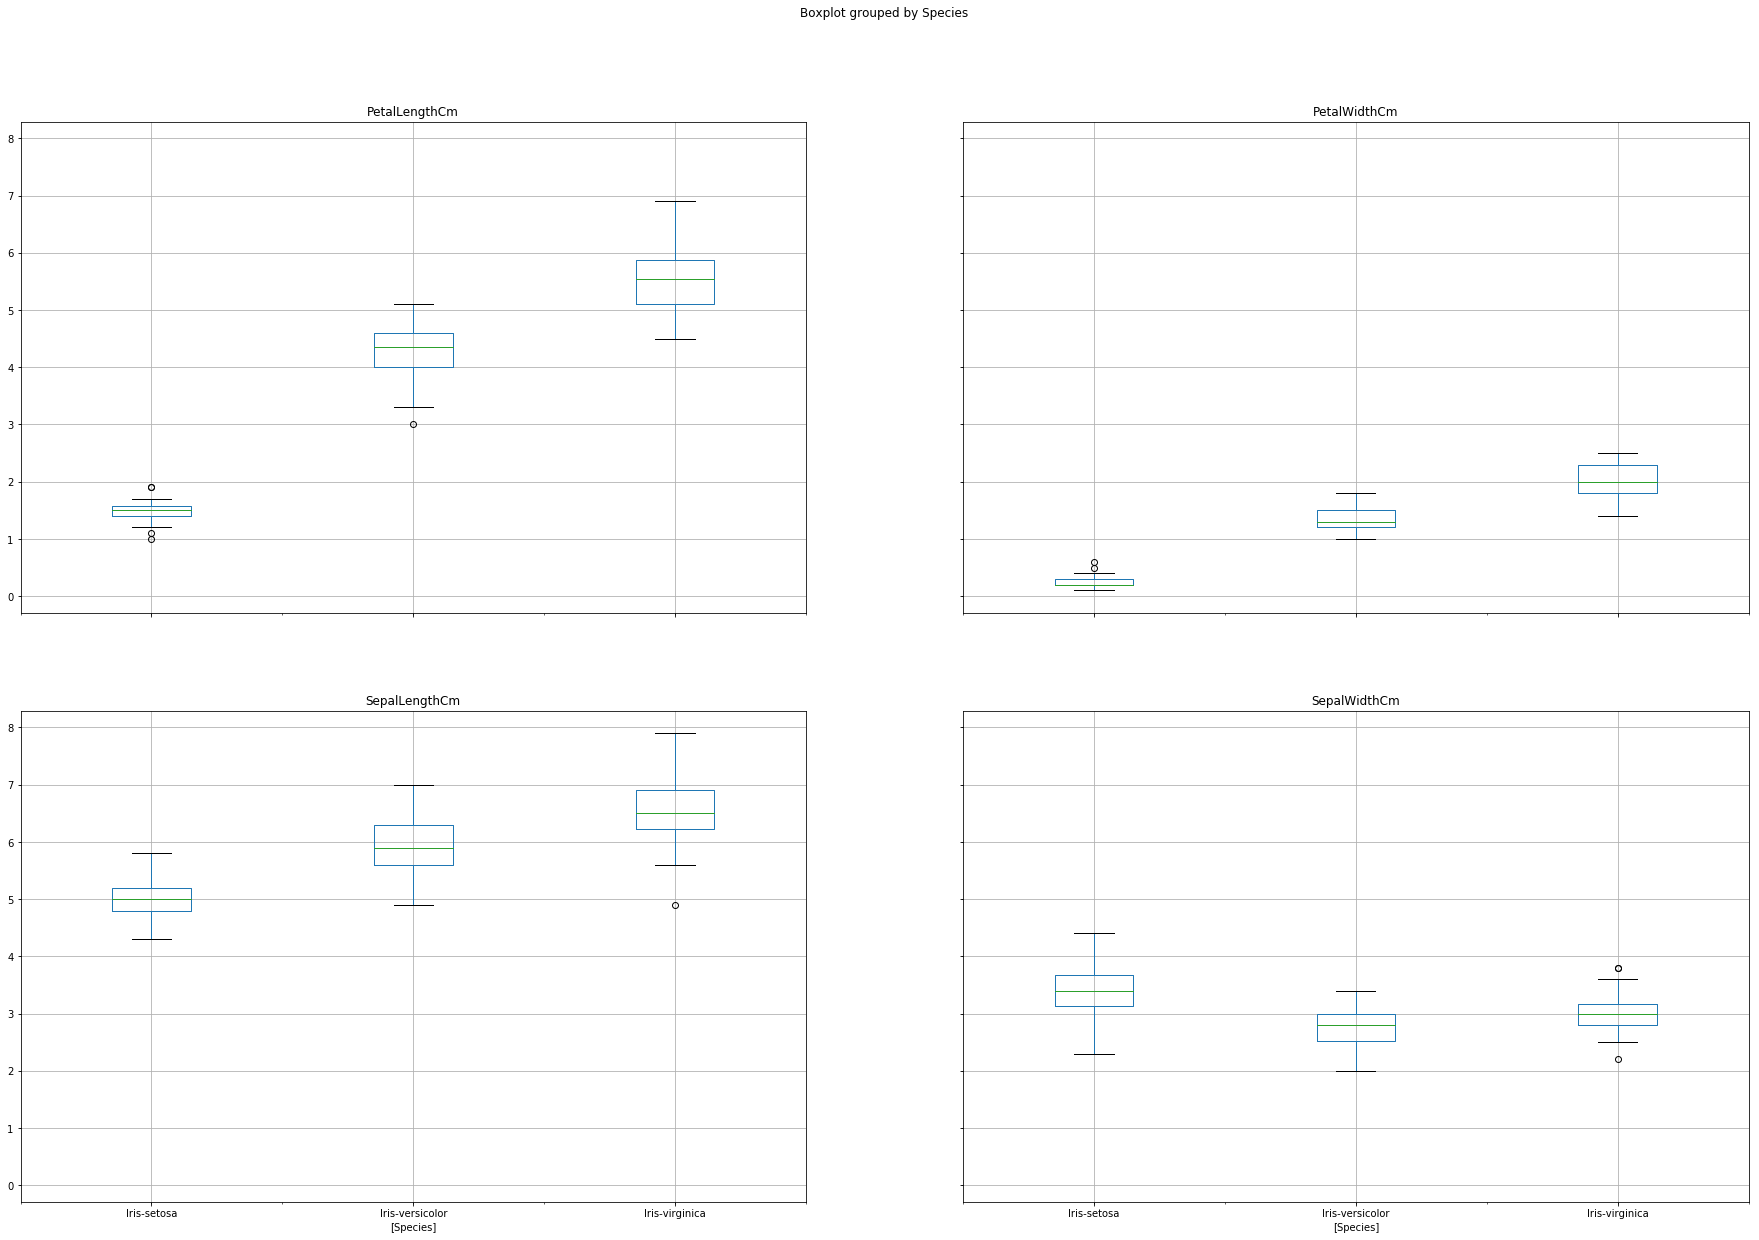

In [11]:
plt.figure()
dataset.drop("Id", axis=1).boxplot(by="Species", figsize=(30, 20))
plt.show()

## 2) Data preprocessing

#### Xác định  ``features`` và ``labels``

In [12]:
feature_columns = ['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm','PetalWidthCm']
X = dataset[feature_columns].values
y = dataset['Species'].values


In [13]:
#  Có thể sử dụng cách khác để có cùng một kết quả
# X = dataset.iloc[:, 1:5].values
# y = dataset.iloc[:, 5].values

#### Encoding (Lable Encoding)

``Species`` (label) là  categorical variables. Do đó chúng ta phải chuyển đổi  Species thành số trước khi đưa vào cho KNeighborsClassifier does not accept string labels

- Iris-setosa correspond to 0
- Iris-versicolor correspond to 1 
- Iris-virginica correspond to 2

In [14]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y = le.fit_transform(y)

####  Spliting dataset into training set and test set

- training set: dùng để xây dựng classifier
- test set: sẽ được sử dụng để evaluate liệu  classifier  tốt hay không

In [15]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [16]:
X_train.shape #120 rows dùng để train(80%)

(120, 4)

In [17]:
y_train.shape

(120,)

In [18]:
X_test.shape #30 rows dùng để test (20%)

(30, 4)

In [19]:
y_test.shape

(30,)

## 3) Using KNN for classification

####  Xây dựng model

In [20]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.model_selection import cross_val_score



#### Thay đổi ``k`` để tìm ``k`` phù hợp

In [21]:

#Setup arrays to store training and test accuracies
neighbors = np.arange(1,9)
train_accuracy =np.empty(len(neighbors))
test_accuracy = np.empty(len(neighbors))

for i,k in enumerate(neighbors):
    #Setup a knn classifier with k neighbors
    knn = KNeighborsClassifier(n_neighbors=k)
    
    #Fit the model
    knn.fit(X_train, y_train)
    
    #Compute accuracy on the training set
    train_accuracy[i] = knn.score(X_train, y_train)
    
    #Compute accuracy on the test set
    test_accuracy[i] = knn.score(X_test, y_test) 

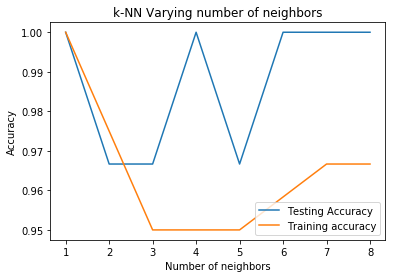

In [22]:
#Generate plot
plt.title('k-NN Varying number of neighbors')
plt.plot(neighbors, test_accuracy, label='Testing Accuracy')
plt.plot(neighbors, train_accuracy, label='Training accuracy')
plt.legend()
plt.xlabel('Number of neighbors')
plt.ylabel('Accuracy')
plt.show()

#### Từ biểu đồ trên, ta chọn ``k = 1`` để xây dựng model

In [23]:
# Tạo model (k = 1)
classifier = KNeighborsClassifier(n_neighbors=1)

# Fitting the model
classifier.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=1, p=2,
           weights='uniform')

####  Prediction

In [24]:
# Predicting on the test set
y_pred = classifier.predict(X_test)
y_pred

array([2, 1, 0, 2, 0, 2, 0, 1, 1, 1, 2, 1, 1, 1, 1, 0, 1, 1, 0, 0, 2, 1,
       0, 0, 2, 0, 0, 1, 1, 0])

####  Evaluating the model for the test set
- Tương tự cho training set

Xây dựng confusion matrix:

In [25]:
cm = confusion_matrix(y_test, y_pred)
cm

array([[11,  0,  0],
       [ 0, 13,  0],
       [ 0,  0,  6]], dtype=int64)

##### Accuracy:

Cách 1:

In [26]:
#Sử dụng hàm accuracy_score
accuracy = accuracy_score(y_test, y_pred)*100
print('Accuracy of our model is equal ' + str(round(accuracy, 2)) + ' %.')

Accuracy of our model is equal 100.0 %.


Cách 2:

In [27]:
# Tính accuracy bằng tay dựa trên confusion matrix
acccuracy_byhand = (11+13+6)/(11+13+6+0+0+0+0)
acccuracy_byhand

1.0

Cách 3:

In [28]:
knn.score(X_test, y_test)

1.0